# <h2>Importing the Libraries</h2>

In [96]:
# imported all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# load the excel file 
data = pd.read_excel(r"/Users/DivyaThakkar/Desktop/project-latest/All_Flight_Data_Final.xlsx")
# Display the first 10 rows
data.head(10)

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price
0,Indigo,2023-04-01,23:00:00,Bangalore,01h 05m,non-stop,00:05:00,Hyderabad,2468
1,Vistara,2023-04-01,21:25:00,Bangalore,01h 05m,non-stop,22:30:00,Hyderabad,2652
2,AirAsia,2023-04-01,13:20:00,Bangalore,01h 15m,non-stop,14:35:00,Hyderabad,2954
3,Vistara,2023-04-01,18:30:00,Bangalore,01h 10m,non-stop,19:40:00,Hyderabad,2862
4,Indigo,2023-04-01,22:00:00,Bangalore,01h 05m,non-stop,23:05:00,Hyderabad,2954
5,AirAsia,2023-04-01,15:40:00,Bangalore,01h 10m,non-stop,16:50:00,Hyderabad,3254
6,AkasaAir,2023-04-01,18:25:00,Bangalore,01h 10m,non-stop,19:35:00,Hyderabad,2741
7,AirAsia,2023-04-01,14:05:00,Bangalore,01h 10m,non-stop,15:15:00,Hyderabad,3954
8,Indigo,2023-04-01,20:00:00,Bangalore,01h 05m,non-stop,21:05:00,Hyderabad,3771
9,Indigo,2023-04-01,23:50:00,Bangalore,06h 20m,1-stop,06:10:00,Hyderabad,4209


# EDA

In [98]:
# Checking for null values
data.isnull().sum()

flight_name        0
date               0
departure_time     0
departure_loc      0
flight_duration    0
stops              0
arrival_time       0
arrival_loc        0
price              0
dtype: int64

In [99]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320787 entries, 0 to 320786
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   flight_name      320787 non-null  object        
 1   date             320787 non-null  datetime64[ns]
 2   departure_time   320787 non-null  object        
 3   departure_loc    320787 non-null  object        
 4   flight_duration  320787 non-null  object        
 5   stops            320787 non-null  object        
 6   arrival_time     320787 non-null  object        
 7   arrival_loc      320787 non-null  object        
 8   price            320787 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 22.0+ MB


<Axes: >

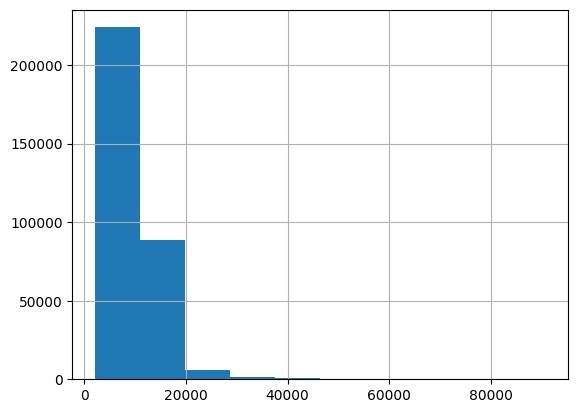

In [100]:
# Distribution of Prices

data['price'].hist()

# Airline vs Price

sns.catplot(y = 'price', x = 'flight_name', data = data.sort_values('price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

# <h2>Feature Engineering / Data Preproccesing</h2>

In [101]:
data['dep_hour'] = pd.to_datetime(data['departure_time'].astype(str)).dt.hour
data['dep_min'] = pd.to_datetime(data['departure_time'].astype(str)).dt.minute
data

/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/851089227.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_hour'] = pd.to_datetime(data['departure_time'].astype(str)).dt.hour
/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/851089227.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_min'] = pd.to_datetime(data['departure_time'].astype(str)).dt.minute


,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min
0,Indigo,2023-04-01,23:00:00,Bangalore,01h 05m,non-stop,00:05:00,Hyderabad,2468,23,0
1,Vistara,2023-04-01,21:25:00,Bangalore,01h 05m,non-stop,22:30:00,Hyderabad,2652,21,25
2,AirAsia,2023-04-01,13:20:00,Bangalore,01h 15m,non-stop,14:35:00,Hyderabad,2954,13,20
3,Vistara,2023-04-01,18:30:00,Bangalore,01h 10m,non-stop,19:40:00,Hyderabad,2862,18,30
4,Indigo,2023-04-01,22:00:00,Bangalore,01h 05m,non-stop,23:05:00,Hyderabad,2954,22,0
...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,2023-05-31,05:20:00,Delhi,13h 05m,1-stop,18:25:00,Mumbai,20394,5,20
320783,Air India,2023-05-31,10:15:00,Delhi,05h 25m,1-stop,15:40:00,Mumbai,20130,10,15
320784,GO FIRST,2023-05-31,11:50:00,Delhi,06h 35m,1-stop,18:25:00,Mumbai,25922,11,50
320785,GO FIRST,2023-05-31,05:20:00,Delhi,06h 10m,1-stop,11:30:00,Mumbai,26130,5,20


In [102]:
data['arr_hour'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.hour
data['arr_min'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.minute
data

/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/3580146416.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['arr_hour'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.hour
/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/3580146416.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['arr_min'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.minute


,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min
0,Indigo,2023-04-01,23:00:00,Bangalore,01h 05m,non-stop,00:05:00,Hyderabad,2468,23,0,0,5
1,Vistara,2023-04-01,21:25:00,Bangalore,01h 05m,non-stop,22:30:00,Hyderabad,2652,21,25,22,30
2,AirAsia,2023-04-01,13:20:00,Bangalore,01h 15m,non-stop,14:35:00,Hyderabad,2954,13,20,14,35
3,Vistara,2023-04-01,18:30:00,Bangalore,01h 10m,non-stop,19:40:00,Hyderabad,2862,18,30,19,40
4,Indigo,2023-04-01,22:00:00,Bangalore,01h 05m,non-stop,23:05:00,Hyderabad,2954,22,0,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,2023-05-31,05:20:00,Delhi,13h 05m,1-stop,18:25:00,Mumbai,20394,5,20,18,25
320783,Air India,2023-05-31,10:15:00,Delhi,05h 25m,1-stop,15:40:00,Mumbai,20130,10,15,15,40
320784,GO FIRST,2023-05-31,11:50:00,Delhi,06h 35m,1-stop,18:25:00,Mumbai,25922,11,50,18,25
320785,GO FIRST,2023-05-31,05:20:00,Delhi,06h 10m,1-stop,11:30:00,Mumbai,26130,5,20,11,30


In [103]:
data['Journey_Day'] = pd.to_datetime(data['date']).dt.day
data['Journey_Month'] = pd.to_datetime(data['date']).dt.month
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,Indigo,2023-04-01,23:00:00,Bangalore,01h 05m,non-stop,00:05:00,Hyderabad,2468,23,0,0,5,1,4
1,Vistara,2023-04-01,21:25:00,Bangalore,01h 05m,non-stop,22:30:00,Hyderabad,2652,21,25,22,30,1,4
2,AirAsia,2023-04-01,13:20:00,Bangalore,01h 15m,non-stop,14:35:00,Hyderabad,2954,13,20,14,35,1,4
3,Vistara,2023-04-01,18:30:00,Bangalore,01h 10m,non-stop,19:40:00,Hyderabad,2862,18,30,19,40,1,4
4,Indigo,2023-04-01,22:00:00,Bangalore,01h 05m,non-stop,23:05:00,Hyderabad,2954,22,0,23,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,2023-05-31,05:20:00,Delhi,13h 05m,1-stop,18:25:00,Mumbai,20394,5,20,18,25,31,5
320783,Air India,2023-05-31,10:15:00,Delhi,05h 25m,1-stop,15:40:00,Mumbai,20130,10,15,15,40,31,5
320784,GO FIRST,2023-05-31,11:50:00,Delhi,06h 35m,1-stop,18:25:00,Mumbai,25922,11,50,18,25,31,5
320785,GO FIRST,2023-05-31,05:20:00,Delhi,06h 10m,1-stop,11:30:00,Mumbai,26130,5,20,11,30,31,5


In [104]:
data.drop(['date','departure_time','arrival_time'], axis = 1, inplace = True)
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,Indigo,Bangalore,01h 05m,non-stop,Hyderabad,2468,23,0,0,5,1,4
1,Vistara,Bangalore,01h 05m,non-stop,Hyderabad,2652,21,25,22,30,1,4
2,AirAsia,Bangalore,01h 15m,non-stop,Hyderabad,2954,13,20,14,35,1,4
3,Vistara,Bangalore,01h 10m,non-stop,Hyderabad,2862,18,30,19,40,1,4
4,Indigo,Bangalore,01h 05m,non-stop,Hyderabad,2954,22,0,23,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,Delhi,13h 05m,1-stop,Mumbai,20394,5,20,18,25,31,5
320783,Air India,Delhi,05h 25m,1-stop,Mumbai,20130,10,15,15,40,31,5
320784,GO FIRST,Delhi,06h 35m,1-stop,Mumbai,25922,11,50,18,25,31,5
320785,GO FIRST,Delhi,06h 10m,1-stop,Mumbai,26130,5,20,11,30,31,5


In [105]:
data['stops'].value_counts()

stops
1-stop                243935
non-stop               58830
2+-stop                16392
1-stopVia Indore         638
1-stopVia IDR            582
1-stopVia Mumbai         151
1-stopVia VTZ            108
1-stopVia Delhi          105
1-stopVia Bagdogra        46
Name: count, dtype: int64

In [106]:
data.replace({'non-stop ' : 0, '1-stop' : 1, '1-stopVia Indore' : 1,'1-stopVia Mumbai' : 1, '2+-stop' : 2,'1-stopVia IDR' : 1,'1-stopVia VTZ' : 1,'1-stopVia Delhi' : 1,'1-stopVia Bagdogra' : 1}, inplace=True)
data

/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/2893182415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'non-stop ' : 0, '1-stop' : 1, '1-stopVia Indore' : 1,'1-stopVia Mumbai' : 1, '2+-stop' : 2,'1-stopVia IDR' : 1,'1-stopVia VTZ' : 1,'1-stopVia Delhi' : 1,'1-stopVia Bagdogra' : 1}, inplace=True)


,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,Indigo,Bangalore,01h 05m,0,Hyderabad,2468,23,0,0,5,1,4
1,Vistara,Bangalore,01h 05m,0,Hyderabad,2652,21,25,22,30,1,4
2,AirAsia,Bangalore,01h 15m,0,Hyderabad,2954,13,20,14,35,1,4
3,Vistara,Bangalore,01h 10m,0,Hyderabad,2862,18,30,19,40,1,4
4,Indigo,Bangalore,01h 05m,0,Hyderabad,2954,22,0,23,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,Delhi,13h 05m,1,Mumbai,20394,5,20,18,25,31,5
320783,Air India,Delhi,05h 25m,1,Mumbai,20130,10,15,15,40,31,5
320784,GO FIRST,Delhi,06h 35m,1,Mumbai,25922,11,50,18,25,31,5
320785,GO FIRST,Delhi,06h 10m,1,Mumbai,26130,5,20,11,30,31,5


In [107]:
data['stops'].value_counts()

stops
1    245565
0     58830
2     16392
Name: count, dtype: int64

In [108]:
duration = list(data['flight_duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [109]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,Indigo,Bangalore,01h 05m,0,Hyderabad,2468,23,0,0,5,1,4,1,5
1,Vistara,Bangalore,01h 05m,0,Hyderabad,2652,21,25,22,30,1,4,1,5
2,AirAsia,Bangalore,01h 15m,0,Hyderabad,2954,13,20,14,35,1,4,1,15
3,Vistara,Bangalore,01h 10m,0,Hyderabad,2862,18,30,19,40,1,4,1,10
4,Indigo,Bangalore,01h 05m,0,Hyderabad,2954,22,0,23,5,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,Delhi,13h 05m,1,Mumbai,20394,5,20,18,25,31,5,13,5
320783,Air India,Delhi,05h 25m,1,Mumbai,20130,10,15,15,40,31,5,5,25
320784,GO FIRST,Delhi,06h 35m,1,Mumbai,25922,11,50,18,25,31,5,6,35
320785,GO FIRST,Delhi,06h 10m,1,Mumbai,26130,5,20,11,30,31,5,6,10


In [110]:
data.drop(['flight_duration'],axis=1,inplace=True)
data

,flight_name,departure_loc,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,Indigo,Bangalore,0,Hyderabad,2468,23,0,0,5,1,4,1,5
1,Vistara,Bangalore,0,Hyderabad,2652,21,25,22,30,1,4,1,5
2,AirAsia,Bangalore,0,Hyderabad,2954,13,20,14,35,1,4,1,15
3,Vistara,Bangalore,0,Hyderabad,2862,18,30,19,40,1,4,1,10
4,Indigo,Bangalore,0,Hyderabad,2954,22,0,23,5,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,Delhi,1,Mumbai,20394,5,20,18,25,31,5,13,5
320783,Air India,Delhi,1,Mumbai,20130,10,15,15,40,31,5,5,25
320784,GO FIRST,Delhi,1,Mumbai,25922,11,50,18,25,31,5,6,35
320785,GO FIRST,Delhi,1,Mumbai,26130,5,20,11,30,31,5,6,10


In [111]:
data['flight_name'].value_counts()

flight_name
Vistara        94901
Air India      93839
Indigo         82660
AirAsia        20607
GO FIRST       17395
SpiceJet        6652
AkasaAir        4046
AllianceAir      622
StarAir           65
Name: count, dtype: int64

In [112]:
Airline = data['flight_name']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False


In [113]:
list1 = ['departure_loc', 'arrival_loc']
for l in list1:
    print(data[[l]].value_counts(), '\n')

departure_loc
Bangalore        99284
Delhi            79409
Mumbai           72637
Chennai          69457
Name: count, dtype: int64 

arrival_loc
Mumbai         82200
Delhi          80711
Kolkata        77496
Hyderabad      57836
Bangalore      22544
Name: count, dtype: int64 



In [114]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data

,flight_name,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,departure_loc_Chennai,departure_loc_Delhi,departure_loc_Mumbai,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_Mumbai
0,Indigo,0,2468,23,0,0,5,1,4,1,5,False,False,False,False,True,False,False
1,Vistara,0,2652,21,25,22,30,1,4,1,5,False,False,False,False,True,False,False
2,AirAsia,0,2954,13,20,14,35,1,4,1,15,False,False,False,False,True,False,False
3,Vistara,0,2862,18,30,19,40,1,4,1,10,False,False,False,False,True,False,False
4,Indigo,0,2954,22,0,23,5,1,4,1,5,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,1,20394,5,20,18,25,31,5,13,5,False,True,False,False,False,False,True
320783,Air India,1,20130,10,15,15,40,31,5,5,25,False,True,False,False,False,False,True
320784,GO FIRST,1,25922,11,50,18,25,31,5,6,35,False,True,False,False,False,False,True
320785,GO FIRST,1,26130,5,20,11,30,31,5,6,10,False,True,False,False,False,False,True


In [115]:
data = pd.concat([data, Airline], axis = 1)
data

,flight_name,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,...,arrival_loc_Kolkata,arrival_loc_Mumbai,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,Indigo,0,2468,23,0,0,5,1,4,1,...,False,False,False,False,False,False,True,False,False,False
1,Vistara,0,2652,21,25,22,30,1,4,1,...,False,False,False,False,False,False,False,False,False,True
2,AirAsia,0,2954,13,20,14,35,1,4,1,...,False,False,True,False,False,False,False,False,False,False
3,Vistara,0,2862,18,30,19,40,1,4,1,...,False,False,False,False,False,False,False,False,False,True
4,Indigo,0,2954,22,0,23,5,1,4,1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,GO FIRST,1,20394,5,20,18,25,31,5,13,...,False,True,False,False,False,True,False,False,False,False
320783,Air India,1,20130,10,15,15,40,31,5,5,...,False,True,False,False,False,False,False,False,False,False
320784,GO FIRST,1,25922,11,50,18,25,31,5,6,...,False,True,False,False,False,True,False,False,False,False
320785,GO FIRST,1,26130,5,20,11,30,31,5,6,...,False,True,False,False,False,True,False,False,False,False


In [116]:
data.drop(['flight_name'],axis=1,inplace=True)
data

,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,arrival_loc_Kolkata,arrival_loc_Mumbai,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,0,2468,23,0,0,5,1,4,1,5,...,False,False,False,False,False,False,True,False,False,False
1,0,2652,21,25,22,30,1,4,1,5,...,False,False,False,False,False,False,False,False,False,True
2,0,2954,13,20,14,35,1,4,1,15,...,False,False,True,False,False,False,False,False,False,False
3,0,2862,18,30,19,40,1,4,1,10,...,False,False,False,False,False,False,False,False,False,True
4,0,2954,22,0,23,5,1,4,1,5,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320782,1,20394,5,20,18,25,31,5,13,5,...,False,True,False,False,False,True,False,False,False,False
320783,1,20130,10,15,15,40,31,5,5,25,...,False,True,False,False,False,False,False,False,False,False
320784,1,25922,11,50,18,25,31,5,6,35,...,False,True,False,False,False,True,False,False,False,False
320785,1,26130,5,20,11,30,31,5,6,10,...,False,True,False,False,False,True,False,False,False,False


# <h2>Feature Selection/Importance</h2>

In [117]:
data.shape

(320787, 25)

In [118]:
data.columns

Index(['stops', 'price', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Mumbai',
       'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
       'arrival_loc_Mumbai', 'AirAsia', 'AkasaAir', 'AllianceAir', 'GO FIRST',
       'Indigo', 'SpiceJet', 'StarAir', 'Vistara'],
      dtype='object')

In [119]:
X = data.loc[:, ['stops', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Mumbai',
       'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
       'arrival_loc_Mumbai', 'AirAsia', 'AkasaAir', 'AllianceAir', 'GO FIRST',
       'Indigo', 'SpiceJet', 'StarAir', 'Vistara']]
X.head()

,stops,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,departure_loc_Chennai,...,arrival_loc_Kolkata,arrival_loc_Mumbai,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
0,0,23,0,0,5,1,4,1,5,False,...,False,False,False,False,False,False,True,False,False,False
1,0,21,25,22,30,1,4,1,5,False,...,False,False,False,False,False,False,False,False,False,True
2,0,13,20,14,35,1,4,1,15,False,...,False,False,True,False,False,False,False,False,False,False
3,0,18,30,19,40,1,4,1,10,False,...,False,False,False,False,False,False,False,False,False,True
4,0,22,0,23,5,1,4,1,5,False,...,False,False,False,False,False,False,True,False,False,False


In [120]:
y = data.iloc[:, 1]
y.head()

0    2468
1    2652
2    2954
3    2862
4    2954
Name: price, dtype: int64

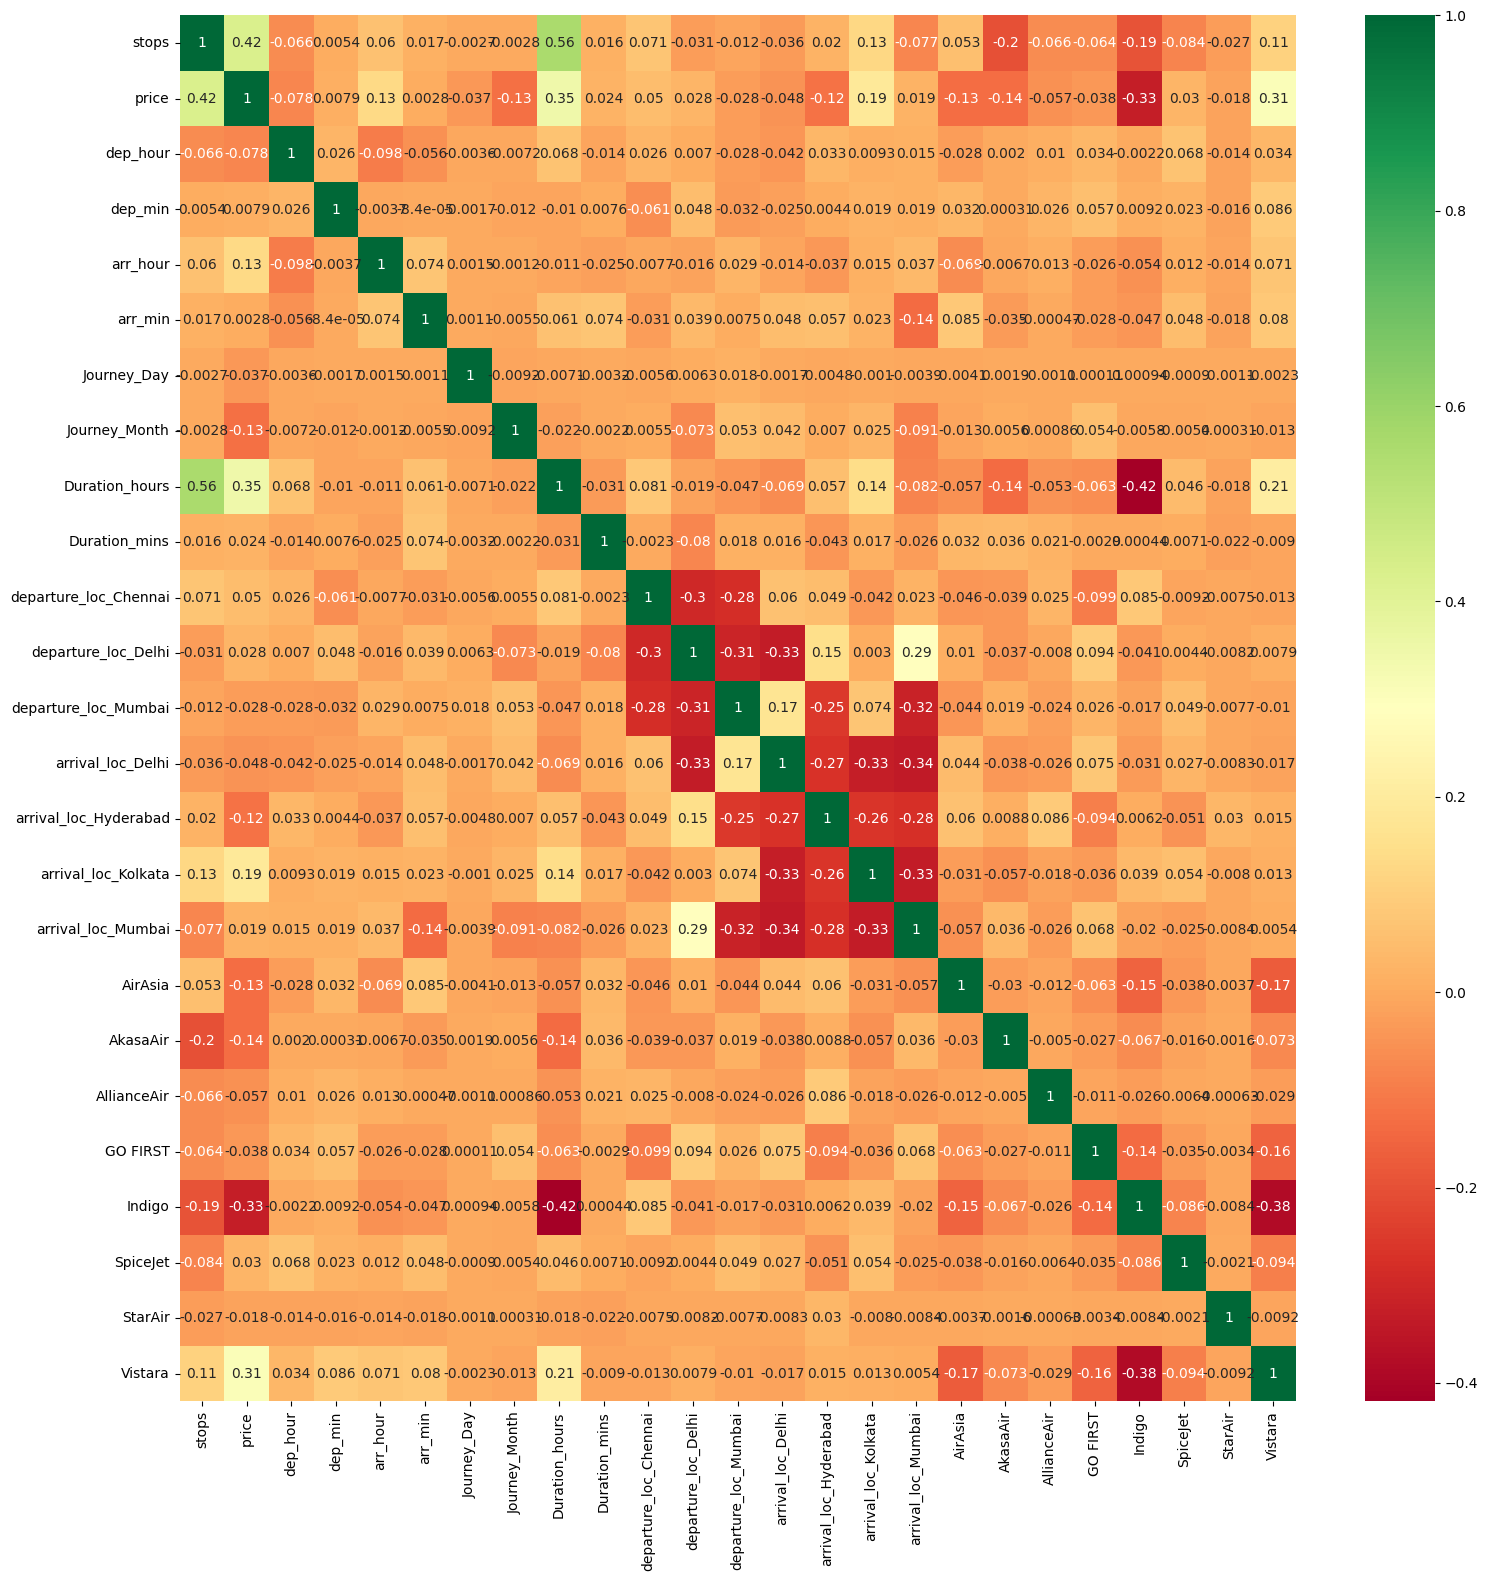

In [121]:
plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [122]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [123]:
print(selection.feature_importances_)

[1.54395005e-01 3.71329115e-02 4.00771973e-02 5.75288984e-02
 6.94208304e-02 1.03057298e-01 6.22067409e-02 7.22198369e-02
 3.02375323e-02 3.28821703e-02 2.57606000e-02 1.29761915e-02
 1.61996629e-02 1.41287715e-02 4.49799058e-02 5.58459660e-02
 3.69316413e-02 8.26473450e-04 1.92763093e-04 7.27372968e-03
 9.58882388e-02 7.66649838e-03 6.15058647e-06 2.21649853e-02]


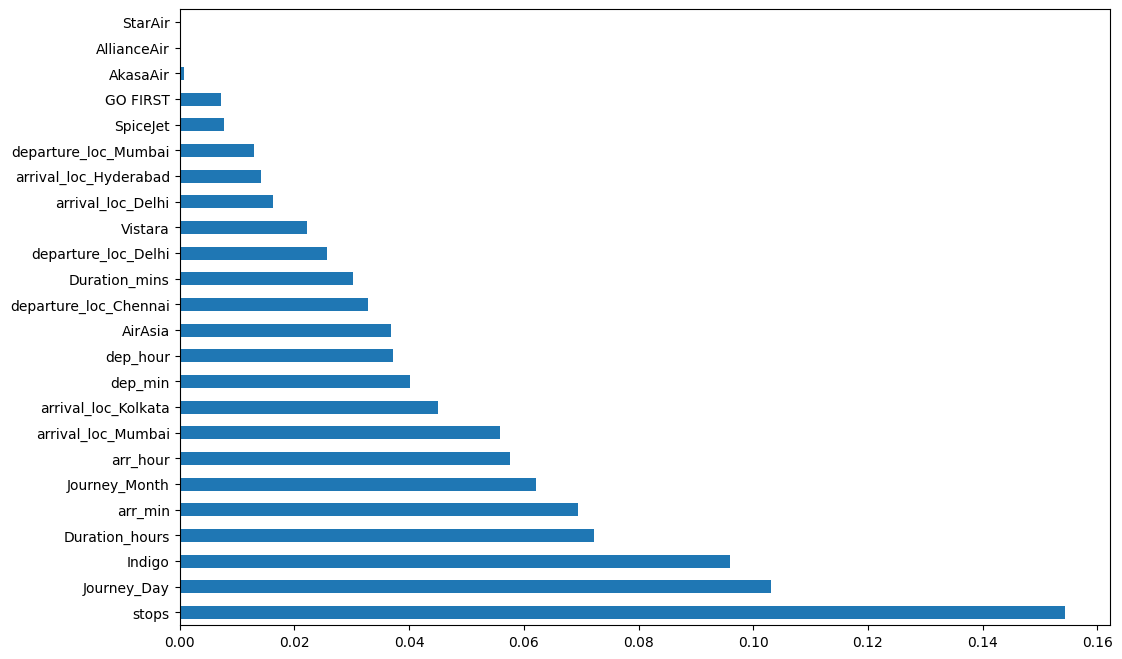

In [124]:
# Feature Importances

plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# <h2>Feature Scaling</h2>

In [125]:
x = data.drop(['price'],axis=1)
y = data['price']

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

array([-1.86274129,  1.81888779, -1.37475062, -2.18717816, -1.24924544,
       -1.71126742, -1.40884268, -1.27206631, -1.25534566, -0.52569742,
       -0.57356946, -0.54103058, -0.5798184 ,  2.13225081, -0.56438651,
       -0.58696543, -0.26200918, -0.11302143, -0.04407662, -0.23944742,
        1.69729222, -0.14551842, -0.01423614, -0.6481727 ])

In [127]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((224550, 24), (96237, 24), (224550,), (96237,))

# <h2><center>ExtraTreesRegressor Model</center></h2>

In [128]:
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor()

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [130]:
y_pred = selection.predict(x_test)

In [131]:
metrics(y_test, y_pred)

RMSE: 1538.2868159139598
R_Squared_Value: 0.8936116558591193


In [132]:
accuracy(y_test, y_pred)

93.73120754539623

# <h2><center>Linear Regression Model</center></h2>

In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [135]:
y_pred = model.predict(x_test)

In [136]:
metrics(y_test, y_pred)

RMSE: 3750.503051575218
R_Squared_Value: 0.3675903911189762


In [137]:
accuracy(y_test, y_pred)

72.08825429672268

/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


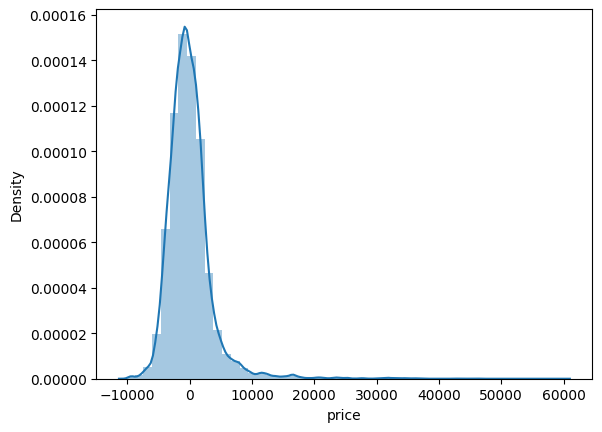

In [138]:
sns.distplot(y_test-y_pred)
plt.show()

# <h2><center>XGBoost Model</center></h2>

In [139]:
import xgboost as xg

In [140]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [141]:
xgb_r.fit(x_train, y_train)

/Users/DivyaThakkar/Desktop/project-latest/myenv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:10:39] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [142]:
pred = xgb_r.predict(x_test)

In [143]:
from sklearn.metrics import mean_squared_error as MSE

In [144]:
metrics(y_test, pred)

RMSE: 2928.6425070729615
R_Squared_Value: 0.6143865825627788


In [145]:
accuracy(y_test, pred)

80.9530879650531

/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/3860349970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


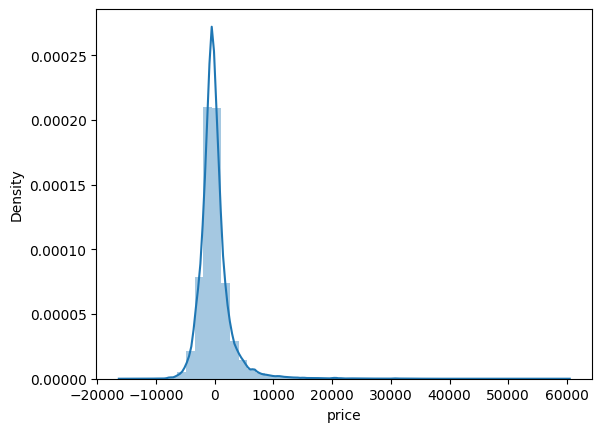

In [146]:
sns.distplot(y_test-pred)
plt.show()

# <center>Random Forest Model</center>

In [147]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3)

In [148]:
pred_rf = model_random_forest.predict(x_test)

In [149]:
metrics(y_test, pred_rf)

RMSE: 1433.6152174559454
R_Squared_Value: 0.9075973091978718


In [150]:
accuracy(y_test, pred_rf)

93.83134011627759

/var/folders/tx/63lh8kzx0jz7484h3f8202040000gp/T/ipykernel_26216/3860349970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


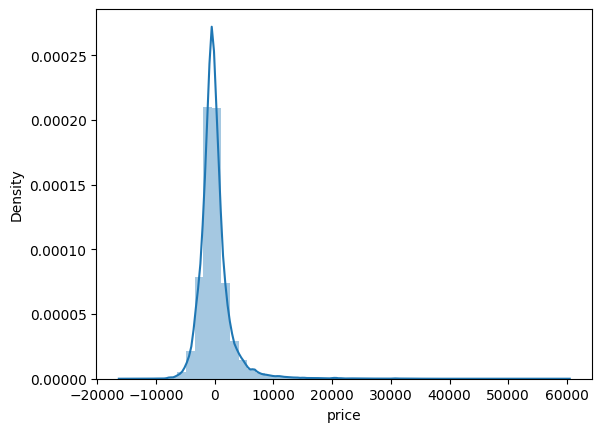

In [151]:
sns.distplot(y_test-pred)
plt.show()

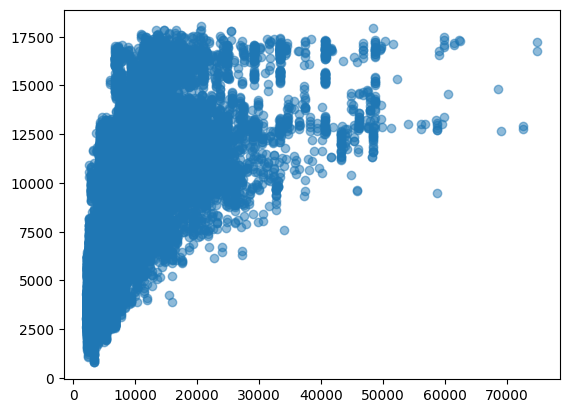

In [152]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

# <h2>Saving the File</h2>

In [153]:
import pickle

In [154]:
model = model_random_forest
pickle.dump(model, open("flight.pkl",'wb'))